In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from time import sleep
from project import api_key
from project import email

In [18]:
list_state = ['48', '36', '06']
df = pd.DataFrame()
for state in list_state:
    try:
        url_quarterly = 'https://aqs.epa.gov/data/api/quarterlyData/byState?'
        params = {'email': email,
                 'key': api_key,
                 'param': '88101',
                 'bdate':'20200101',
                 'edate':'20201201',
                 'state': state}

        response_quarterly = requests.get(url_quarterly, params=params).json()
        data_quarterly =response_quarterly['Data']
        int_df = pd.DataFrame(data_quarterly)
        df = df.append(int_df)
        sleep(5)
    except:
        print('Oops something went wrong')
        pass

In [19]:
print(df.columns.tolist())

['state_code', 'county_code', 'site_number', 'parameter_code', 'poc', 'latitude', 'longitude', 'datum', 'parameter', 'sample_duration', 'sample_duration_code', 'sample_duration_type', 'pollutant_standard', 'year', 'quarter', 'units_of_measure', 'event_type', 'observation_count', 'observation_percent', 'arithmetic_mean', 'minimum_value', 'maximum_value', 'quarterly_criteria_met', 'actual_days_gt_std', 'estimated_days_gt_std', 'valid_samples', 'valid_day_count', 'scheduled_samples', 'percent_days', 'percent_one_value', 'monitoring_agency_code', 'monitoring_agency', 'local_site_name', 'address', 'state', 'county', 'city', 'tribal_code', 'tribal_land', 'cbsa_code', 'cbsa', 'date_of_last_change']


In [20]:
df.to_csv('Air Quality.csv')

In [21]:
df = df.loc[df['pollutant_standard']=='PM25 Annual 2012']

In [22]:
df = df.loc[((df['event_type'] == 'No Events') | (df['event_type']=='Events Excluded'))]

In [23]:
print(pd.unique(df['quarter']))

['4' '3' '2' '1']


In [24]:
q1_df = df.loc[df['quarter']== '1']
q2_df = df.loc[df['quarter']== '2']
q3_df = df.loc[df['quarter']== '3']
q4_df = df.loc[df['quarter']== '4']

print(q1_df['arithmetic_mean'])

23       3.3791
58       8.4989
83       6.5571
110      8.0899
138      8.7119
         ...   
4556     4.9644
4584     7.0791
4612     4.3148
4640     4.0934
4668    11.3422
Name: arithmetic_mean, Length: 231, dtype: float64


Text(0.5, 0, 'Quarter')

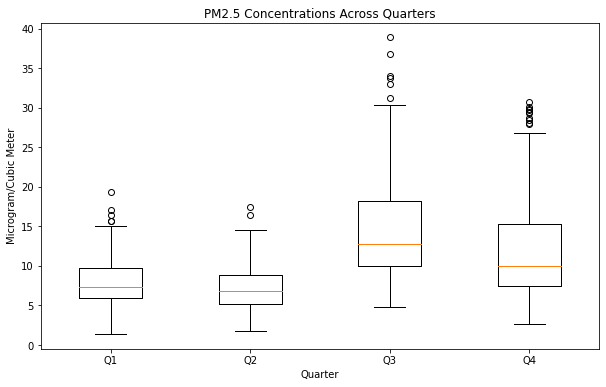

In [25]:
q1_df = q1_df.dropna(subset=['arithmetic_mean'])
q2_df = q2_df.dropna(subset=['arithmetic_mean'])

data_to_plot = [q1_df['arithmetic_mean'], q2_df['arithmetic_mean'], q3_df['arithmetic_mean'], q4_df['arithmetic_mean']]
plt.figure(figsize=(10, 6))
box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4],
                  labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('PM2.5 Concentrations Across Quarters')
plt.ylabel('Microgram/Cubic Meter')
plt.xlabel('Quarter')


In [26]:
q1_mean = q1_df['arithmetic_mean'].mean()
q1_mean

8.027275652173914

In [27]:
q2_mean = q2_df['arithmetic_mean'].mean()
q2_mean

7.145295575221235

In [28]:
q3_mean = q3_df['arithmetic_mean'].mean()

In [29]:
q4_mean = q4_df['arithmetic_mean'].mean()

In [30]:
quarter_means = [q1_mean, q2_mean, q3_mean, q4_mean]

Text(0.5, 1.0, 'Average PM2.5 Concentrations Throughout the Year')

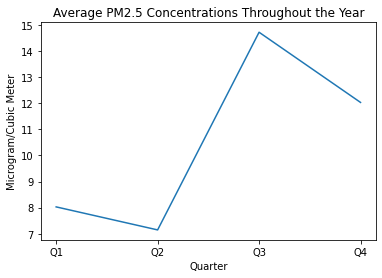

In [31]:
plt.plot(quarter_means)
plt.xticks(ticks = [0,1,2,3],labels=['Q1', 'Q2', 'Q3', 'Q4'])
plt.ylabel('Microgram/Cubic Meter')
plt.xlabel('Quarter')
plt.title('Average PM2.5 Concentrations Throughout the Year')